In [ ]:
!wget "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

--2024-09-11 16:46:15--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 96.7.158.17, 2600:1409:9800:48e::317f, 2600:1409:9800:480::317f
Connecting to download.microsoft.com (download.microsoft.com)|96.7.158.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip’

kagglecatsanddogs_5 100%[===================>] 786.67M   109MB/s    in 8.6s    

2024-09-11 16:46:23 (91.4 MB/s) - ‘kagglecatsanddogs_5340.zip’ saved [824887076/824887076]



In [ ]:
!unzip -q "/content/kagglecatsanddogs_5340.zip"

In [ ]:
!ls "PetImages/"

Cat  Dog


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import os
from tqdm import tqdm

In [ ]:
# Number of Dog images
len(os.listdir("PetImages/Dog"))

12501

In [ ]:
# Number of Cat images
len(os.listdir("PetImages/Cat"))

12501

In [ ]:
DataPath = pathlib.Path("PetImages")
all_paths = DataPath.glob("*/*.jpg")
all_paths

<generator object Path.glob at 0x7ec9ee2d8350>

In [ ]:
all_paths = list(all_paths)
all_paths[:10]

[PosixPath('PetImages/Cat/4300.jpg'),
 PosixPath('PetImages/Cat/1093.jpg'),
 PosixPath('PetImages/Cat/7436.jpg'),
 PosixPath('PetImages/Cat/8605.jpg'),
 PosixPath('PetImages/Cat/6672.jpg'),
 PosixPath('PetImages/Cat/7159.jpg'),
 PosixPath('PetImages/Cat/10154.jpg'),
 PosixPath('PetImages/Cat/4609.jpg'),
 PosixPath('PetImages/Cat/5844.jpg'),
 PosixPath('PetImages/Cat/9075.jpg')]

In [ ]:
all_paths = list(map(lambda x : str(x) , all_paths))
all_paths[:10]

['PetImages/Cat/4300.jpg',
 'PetImages/Cat/1093.jpg',
 'PetImages/Cat/7436.jpg',
 'PetImages/Cat/8605.jpg',
 'PetImages/Cat/6672.jpg',
 'PetImages/Cat/7159.jpg',
 'PetImages/Cat/10154.jpg',
 'PetImages/Cat/4609.jpg',
 'PetImages/Cat/5844.jpg',
 'PetImages/Cat/9075.jpg']

In [ ]:
from random import shuffle

shuffle(all_paths)
all_paths[:10]

['PetImages/Cat/8781.jpg',
 'PetImages/Dog/1185.jpg',
 'PetImages/Dog/2406.jpg',
 'PetImages/Dog/1631.jpg',
 'PetImages/Cat/7148.jpg',
 'PetImages/Dog/937.jpg',
 'PetImages/Cat/4156.jpg',
 'PetImages/Dog/2329.jpg',
 'PetImages/Dog/9270.jpg',
 'PetImages/Cat/7367.jpg']

In [ ]:
def TestImageQuality(all_paths):
    new_all_paths = []
    for path in tqdm(all_paths):
        try :
            image = tf.io.read_file(path)
            image = tf.io.decode_jpeg(image , channels = 3)
        except :
            continue
        new_all_paths.append(path)
    return new_all_paths

all_paths = TestImageQuality(all_paths)
all_paths[:10]

100%|██████████| 25000/25000 [00:31<00:00, 785.80it/s]


['PetImages/Cat/8781.jpg',
 'PetImages/Dog/1185.jpg',
 'PetImages/Dog/2406.jpg',
 'PetImages/Dog/1631.jpg',
 'PetImages/Cat/7148.jpg',
 'PetImages/Dog/937.jpg',
 'PetImages/Cat/4156.jpg',
 'PetImages/Dog/2329.jpg',
 'PetImages/Dog/9270.jpg',
 'PetImages/Cat/7367.jpg']

In [ ]:
# Getting their respective labels
def get_label(image_path):
    return image_path.split("/")[-2]

all_labels = list(map(lambda x : get_label(x) , all_paths))
all_labels[:10]

['Cat', 'Dog', 'Dog', 'Dog', 'Cat', 'Dog', 'Cat', 'Dog', 'Dog', 'Cat']

In [ ]:
from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
all_labels = Le.fit_transform(all_labels)

all_labels[:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(all_paths , all_labels)

In [ ]:
Train_paths[:10] , Train_labels[:10]

(['PetImages/Dog/12437.jpg',
  'PetImages/Cat/12464.jpg',
  'PetImages/Dog/6869.jpg',
  'PetImages/Dog/4825.jpg',
  'PetImages/Dog/2074.jpg',
  'PetImages/Dog/7479.jpg',
  'PetImages/Cat/945.jpg',
  'PetImages/Cat/11412.jpg',
  'PetImages/Dog/5897.jpg',
  'PetImages/Cat/6329.jpg'],
 array([1, 0, 1, 1, 1, 1, 0, 0, 1, 0]))

In [ ]:
# Function used to decode jpeg into Tensor

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [ ]:
import tensorflow as tf

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMG_SIZE, IMG_SIZE)
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(height_factor=(-0.3, -0.2))
])

In [ ]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
        dataset = dataset.repeat()
    return dataset

In [ ]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 252 ms, sys: 6.09 ms, total: 258 ms
Wall time: 256 ms
(128, 224, 224, 3)
(128,)


Cat


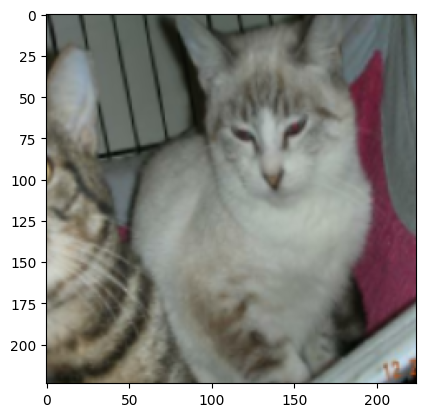

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 30.3 ms, sys: 34 µs, total: 30.3 ms
Wall time: 29.4 ms
(128, 224, 224, 3)
(128,)


Dog


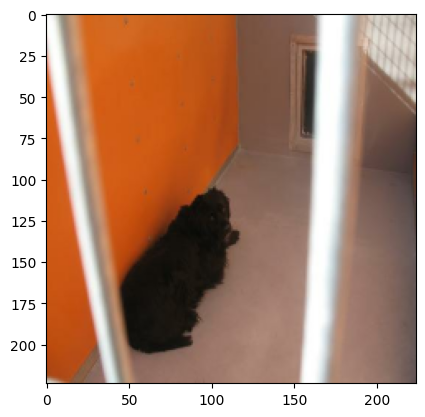

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(label)[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
# Model part
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization , GlobalMaxPool2D

model = Sequential()

# Block 1
model.add(Conv2D(input_shape=(224 , 224 , 3),  padding='same',filters=32, kernel_size=(7, 7)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(filters=64,  padding='valid', kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block 3
model.add(Conv2D(filters=128, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(0.2))

# Block 4
model.add(Conv2D(filters=256, padding='valid', kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256 , kernel_size=(3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(GlobalMaxPool2D())

model.add(Dense(units=256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 108, 108, 64)        │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 108, 108, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 108, 108, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 22, 22, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,084,097 (4.14 MB)

 Trainable params: 1,082,625 (4.13 MB)

 Non-trainable params: 1,472 (5.75 KB)

None


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=10,
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.5370 - loss: 1.5221 - val_accuracy: 0.5216 - val_loss: 0.7732
Epoch 2/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6611 - loss: 0.6160

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


145/145 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.6612 - loss: 0.6158 - val_accuracy: 0.6452 - val_loss: 0.5767
Epoch 3/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - accuracy: 0.7071 - loss: 0.5613 - val_accuracy: 0.6304 - val_loss: 0.6210
Epoch 4/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.7316 - loss: 0.5352 - val_accuracy: 0.6613 - val_loss: 0.7106
Epoch 5/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.7503 - loss: 0.4998 - val_accuracy: 0.7515 - val_loss: 0.4959
Epoch 6/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.7763 - loss: 0.4662 - val_accuracy: 0.6452 - val_loss: 0.6019
Epoch 7/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.7987 - loss: 0.4272 - val_accuracy: 0.7814 - val_loss: 0.4611
Epoch 8/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - accuracy: 0.8185 - loss: 0.4013 - val_accuracy: 0.8871 - val_loss: 0.3381
Epoch 9/10
145/145 ━━━━━━━━━━━━━━━━━━━━ 220s 2s/step - accuracy: 0.8273 - loss: 0.3766 - val_accuracy: 0.738

In [ ]:
# Evaluating the loaded model
loss, acc = model.evaluate(val_dataset)

print(" Testing Acc : " , acc)
print(" Testing Loss : " , loss)

49/49 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.8148 - loss: 0.3979
 Testing Acc :  0.8138898015022278
 Testing Loss :  0.4014733135700226
